# 3. Regresión Logística

Entrenaremos usando scikit-learn una regresión logística para clasificar dígitos manuscritos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
np.set_printoptions(suppress=True)  # no usar notacion "e"

## Conjunto de Datos

Usaremos el ["digits dataset"](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) que viene con scikit-learn.


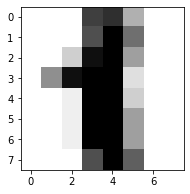

In [3]:
from sklearn import datasets

# Cargamos el dataset entero:
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [4]:
digits.target[1]

1

In [7]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [8]:
# Cargamos sólo vectores X e y:
X, y = datasets.load_digits(return_X_y=True)

In [10]:
X.shape

(1797, 64)

In [11]:
# Cuántas imágenes hay para cada dígito?
from collections import Counter

Counter(y)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento (80%) y otra para evaluación (20%).

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [14]:
X_train.shape, X_test.shape

((1437, 64), (360, 64))

## Instanciar y Entrenar

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)  # entrenamiento

/home/francolq/.virtualenvs/pln/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Inspeccionar Parámetros

In [16]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
# coef_[i, j] es el score que aporte el feature j a la clase i
model.coef_

array([[ 0.        , -0.00481055, -0.07125191,  0.09967566,  0.03678739,
        -0.09590434, -0.10801524, -0.00931637, -0.00009193, -0.04894419,
        -0.01368792,  0.15079321,  0.08517038,  0.08968538, -0.0371555 ,
        -0.00698259, -0.00002545,  0.04703136,  0.14807468, -0.0261566 ,
        -0.32116716,  0.19757049,  0.09082348, -0.00179109, -0.00001259,
         0.11392941,  0.11830185, -0.19077172, -0.49271053,  0.02846844,
         0.07748874, -0.00042589,  0.        ,  0.13087884,  0.11104784,
        -0.18240873, -0.39935769,  0.02827369,  0.0425763 ,  0.        ,
        -0.00094019, -0.05036513,  0.25935548, -0.1100199 , -0.16961014,
         0.11515413,  0.01738826, -0.00056268, -0.00328804, -0.1000517 ,
         0.08527656, -0.01313448,  0.17065788,  0.08146484, -0.05294094,
        -0.00675119, -0.00001531, -0.00898164, -0.09780433,  0.16501645,
        -0.03330174, -0.07810348, -0.06718667, -0.02569132],
       [ 0.        , -0.01658672, -0.0592345 ,  0.04033491, -0.

In [19]:
model.coef_[:,0]  # pixel esquina superior izquierda

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
model.coef_[:,3]  # un pixel arriba al medio

array([ 0.09967566,  0.04033491,  0.06812577,  0.08688928, -0.37239082,
       -0.15794507, -0.05069555,  0.13329228, -0.05026028,  0.20297383])

In [21]:
model.coef_[:,3 + 4 * 8]  # un pixel del medio

array([-0.18240873, -0.18033166, -0.09586155,  0.06172737, -0.1342839 ,
       -0.2234603 ,  0.26506349, -0.07209825,  0.34847403,  0.2131795 ])

In [22]:
model.intercept_  # bias

array([ 0.00078128, -0.08191362,  0.00472313,  0.00414523,  0.05347982,
        0.00397389, -0.00428581,  0.0111837 ,  0.0539352 , -0.0460228 ])

## Evaluar

In [23]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

## Predecir

In [24]:
x = np.array([[ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.]])

In [25]:
x = x.ravel()  # aplanar la matriz en un vector

In [26]:
# Clase más probable:
model.predict([x])

array([1])

In [27]:
# Probabilidad de cada clase (resultado del softmax):
model.predict_proba([x])

array([[0.        , 0.99999174, 0.00000577, 0.00000004, 0.00000043,
        0.        , 0.        , 0.00000006, 0.00000196, 0.        ]])

In [30]:
model.predict_proba([x]).sum()

0.9999999999999998

In [28]:
# "Score" para cada clase (antes del softmax):
model.decision_function([x])

array([[-19.68782223,  19.42326132,   7.35994847,   2.33943766,
          4.76285858, -15.06308684,  -4.27234375,   2.8252399 ,
          6.2825488 ,  -3.97004192]])

In [29]:
# El mismo score a mano:
model.coef_.dot(x) + model.intercept_

array([-19.68782223,  19.42326132,   7.35994847,   2.33943766,
         4.76285858, -15.06308684,  -4.27234375,   2.8252399 ,
         6.2825488 ,  -3.97004192])

## Ejercicios

1. Calcular el softmax a mano para un ejemplo y verificar que da igual que predict_proba.
2. Buscar en el conjunto de test una imagen mal clasificada. Graficarla. ¿Qué tan lejos estuvo de ser correctamente clasificada?
3. Con la imagen anterior, ¿qué píxeles influyeron más en la clasificación incorrecta? Intentar modificar los valores para que la clasifiación sea correcta.
4. Buscar en el conjunto de test la imagen **peor** clasificada. Graficarla. ¿Qué tan difícil es para un humano identificar el dígito?